# Credit Card Fraud Detection - Classification Pipeline

In this notebook, we will be performing credit card fraud detection on a dataset containing 29 masked features. We will be scaling the data, setting up a feature engineering pipeline using <b>Column Transformer</b>, building <b>GLM</b> and <b>Decision Forest</b> models and evaluating the final models.

In [1]:
%connect local

Password: ········


Success: 'local' connection established and activated for user 'demo_user'


In [2]:
DATABASE demo_user

Success: 1 rows affected

In [ ]:
/*CREATE MULTISET TABLE creditcard.train ,
     NO BEFORE JOURNAL,
     NO AFTER JOURNAL,
     CHECKSUM = DEFAULT,
     DEFAULT MERGEBLOCKRATIO
     (   id INTEGER,
         Time_occured VARCHAR(50),
         V1 FLOAT,
         V2 FLOAT,
         V3 FLOAT,
         V4 FLOAT,
         V5 FLOAT,
         V6 FLOAT,
         V7 FLOAT,
         V8 FLOAT,
         V9 FLOAT,
         V10 FLOAT,
         V11 FLOAT,
         V12 FLOAT,
         V13 FLOAT,
         V14 FLOAT,
         V15 FLOAT,
         V16 FLOAT,
         V17 FLOAT,
         V18 FLOAT,
         V19 FLOAT,
         V20 FLOAT,
         V21 FLOAT,
         V22 FLOAT,
         V23 FLOAT,
         V24 FLOAT,
         V25 FLOAT,
         V26 FLOAT,
         V27 FLOAT,
         V28 FLOAT,
         Amount FLOAT,
         Class_label  INT) 
PRIMARY INDEX ( id ); */

In [3]:
-- Show a sample of the training data
select * from demo_user.creditcard_train sample 10;

id Time_occured V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount Class_label 1 111471 72240.0 -0.528460327105296 1.31274061556335 0.846475319859444 -0.190176876843939 0.462157395860515 -0.497266286325471 0.75718027317568 -0.0614570859835881 -0.278248471923933 -0.230410535503682 -0.790528021872017 0.113969254369013 1.13456178184181 -0.723009645304579 0.877211938533526 0.568305497699993 -0.356155059580092 0.0137018066478268 0.189534433292327 0.325514029817088 -0.339760972282432 -0.794572758619507 -0.104543328786077 -0.486905225536016 0.0358171949002755 0.126067502583665 0.358081829818656 0.15395482156477 9.51 0 2 274760 166191.0 -0.400272759093023 -0.987611180737731 0.895049795917515 1.57931500726249 0.620577443823086 -0.844561877985769 -1.00295041702937 0.126107080788681 0.685841080679185 0.151294670795886 -1.24263253971985 -0.16459286954717 -0.0984190266245311 0.0600576317081483 1.63611815585743 -1.01587810248662 0.394588331800784 0.916649964410174 2.42627972759496 0.519339556230291 0.550193902232273 1.52988622381852 0.339655094176358 -0.0611258093498094 -1.49887006179533 0.0743721057167609 0.353240529449592 0.340115889382039 31.85 0 3 26595 34157.0 1.2114059840367 -0.0405742009989692 0.940404765795089 1.14636503208745 -0.561646066146032 0.276408800549257 -0.56451627045211 0.132800245148553 0.922081470928363 -0.205786936041058 -1.50888553875976 0.3017378326671 0.359311156722973 -0.445332946897287 0.219172586950689 0.313502312879721 -0.562596784311749 0.188319324928925 0.103015888915266 -0.0954581894799515 -0.115229246927362 -0.112087946515046 -0.110845154629233 -0.452839050746967 0.532496048090401 -0.357246060877428 0.0725970988582443 0.030131460895437 9.59 0 4 211830 138587.0 1.94928581887509 0.539049528539523 -1.20845467258532 3.84461205136532 0.567693920914973 -0.526820359281041 0.522784707028758 -0.184491276678907 -0.844997068425576 1.52379474303495 -1.75772902599103 -1.26715408034385 -2.06659355928968 0.777147491887178 -1.15643221468718 0.443144764726152 -0.448859702463612 -0.520144483064991 -1.2114982645234 -0.419203905557946 -0.0474358291319516 -0.14917931857323 0.0933743900346664 -0.182162672809413 0.173623661988475 0.0328717937778916 -0.0762374780042498 -0.0642346806431727 14.28 0 5 49389 44036.0 -0.605212636946427 -0.307035074514215 2.20068075569258 -1.40572321981715 -0.630474445036849 -0.380938295290953 -0.381156762731285 0.1553126665592 -0.68220003038483 -0.220037620788499 -0.39252388152977 -0.305069001959262 0.246582166984246 -0.868352411900802 -0.676162770671282 0.579762551692819 0.660500888893416 -1.72080777415646 -0.35744462537414 0.0821015631082024 0.452512743217055 1.34923054226463 -0.157022917268344 0.458989960320404 -0.10046345801724 -0.184847676379655 0.147656267430478 0.136441557675147 14.95 0 6 199138 132823.0 -1.27484480799762 -0.894962689997312 -0.31755213999199 -0.862680808800083 3.3091071429401 0.560315302570572 0.21556359964339 -0.444757670607078 0.99008057676116 0.880497560253292 0.992595731704263 0.178701070614677 -1.01144603069363 -0.0715119735997046 0.484177189027215 -0.82823460522976 -0.572622694214327 -1.15516584893786 -0.497394464466916 -0.982566209543558 -0.379959478256486 -0.0612573250877593 -0.491365916130234 -0.935860478510982 -1.34447134702096 -0.81541711968683 -0.681363643952669 -0.461305966366593 11.84 0 7 234137 147843.0 2.1703841128093 -1.64780180320867 -1.11811209944727 -1.66729129592413 -0.992962715003687 -0.0197379480333947 -1.13630640966935 -0.151009322374399 -1.13685098421164 1.48165478119278 -1.55937543106158 -0.581616442213391 1.50285130666047 -0.759285998950846 -0.0591041355552619 -0.226490780722259 0.0997634087966174 0.197515110376167 0.0394991503036185 -0.147436377016292 -0.135152133267371 -0.0470247735499096 0.114919896008429 0.0394095501732629 -0.16762841996991 -0.178336454207664 0.0097944175436809 -0.0276410709588515 104 0 8 236984 149047.0 1.99716040557543 -0.544146415235838 -0.733953698210502 0.27635330030821

In [4]:
-- Show a sample of the testing data 
select * from demo_user.creditcard_test sample 10;

id Time_occured V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount Class_label 1 230932 146542.0 1.09587939795139 -1.98027330178567 -1.88917140341961 -0.235636786762524 -0.783760142658201 -1.20854250623233 0.826628805278247 -0.489539629359747 1.06885224427664 -0.630918138096788 -0.687855604095086 0.508844305463817 -0.205127937201235 0.431291558318294 0.228150914659206 -0.529883768644249 0.0444748507530968 -0.852278291851355 0.455224662276756 0.823979668279653 0.0621742282716064 -0.790833259690889 -0.168696314056027 0.0460714032171157 -0.421267820781749 0.39265179496942 -0.180485584458618 0.0203299665662209 520.3 0 2 91640 63566.0 -0.739142927680919 1.11782977085371 1.69470084272756 -0.604022733972917 0.496714998104247 -0.471922450317838 0.845872042884416 0.0320108468402484 -0.965517813394156 -0.894445375761585 1.20612751793792 0.722606205907002 0.524794581945841 -0.346244785345608 -0.177025595011469 0.871954817461318 -0.591867097564675 0.347458740010682 -0.215148113585441 -0.0082523295057775 -0.200764518729987 -0.695977656697269 -0.253490824868292 -0.0333952433662786 0.243458910237445 0.0212395229308861 -0.0056166659707709 0.0604892118116783 1.98 0 3 254113 156585.0 1.82801894220962 -0.690965590293454 -0.698009124783368 0.0206659116494978 0.313803434484141 1.89225268799064 -1.00318447324619 0.630465478529783 0.959048168640415 0.0261366796107809 1.02823053419995 1.18940836026569 0.208884744793109 -0.0112676838339124 0.491198717231133 -0.329990949357067 -0.0058808844866126 -0.790616401042645 -0.964717004627998 -0.208189291557541 0.309824324937384 1.1439700750039 0.183758098519038 -0.660350712369924 -0.410095401940612 0.682009231712694 0.0198808919787758 -0.0651827948213072 21.85 0 4 44389 41924.0 -0.437332544178277 -0.492365194392008 0.881372888358949 -2.11645585515473 -1.52465469555147 0.100887344110809 -0.794372904779133 0.452026644764063 -1.36371509971588 0.479796824202536 -2.35006611068562 -1.06805678686348 -0.0168319432215362 -0.890110952438178 -1.95916709008634 -0.531724682187451 0.721297318410071 0.103301007031096 -0.0560557446472723 -0.557103131958763 -0.201855479661061 -0.107117444123192 -0.0780709978182022 -0.467896683106989 -0.0164536819460616 -0.263850153344073 -0.138087748230705 -0.0479555062071287 63.52 0 5 109228 71279.0 0.968033676602338 0.346024356574174 -0.213682949905875 1.42236966288498 -0.0059582858270358 -1.02905492222301 0.566648645036047 -0.260433616086748 -0.349163306072252 -0.548060007644848 0.783860966422101 0.675002281033157 0.591122692903536 -0.717190657336631 1.03078744193465 -0.193752110134464 0.933718296433382 -0.513869889406303 -1.04553611563753 0.0948306682906832 0.0435147748638827 0.0160138508768448 -0.116629351170715 0.546334095878212 0.573940378399982 -0.374716203351078 0.019637046852177 0.0629918667948524 107.48 0 6 129482 79105.0 1.10562153374032 -0.121331300134881 0.582412201405864 0.67501780114602 -0.20385051586007 0.657544395393401 -0.394965062295453 0.321518978350839 0.34752885915672 -0.131218406186303 1.36956877755698 1.3468228884578 -0.171199183998293 0.0576312003465856 -0.598099342855168 -0.762747773189982 0.401427506914582 -0.979209368367391 -0.246371138707201 -0.187252356520684 0.0162019704228046 0.343805004746344 -0.0361303600156832 -0.22522872918193 0.410793717665963 0.480774281281947 0.0147589475553048 -0.0070671469562361 1 0 7 226032 144477.0 -2.20565255094365 -2.13906441392018 0.720376964061512 -2.14855128365695 -0.767782798088154 2.12417347502072 1.66216000617066 0.504084589606052 -1.16529320752349 -0.775292589294412 0.625728219305037 -0.33489330053447 -0.441179886424497 -0.284861174688381 -0.835979578666492 0.719240908622776 0.49997159919251 -2.10845217169648 -0.345253306010395 1.53565245775654 0.221181105406615 -0.489933459830027 1.30935855880782 -1.76036079257028 0.554241571832651 -0.421378244709477 0.0737521906901342 0.139385100478729 616.59 0 8 66012 51842.0 -1.40625274261622 -0.0746855332989184 0.78840805013809 

In [7]:
-- SMOTE performed data spread for training data
select class_label as "Class", 1.000 * count(*) / (select count(*) from creditcard_train) as Percentage
from creditcard_train
group by "Class";

Class Percentage 1 1 .003 2 0 .997

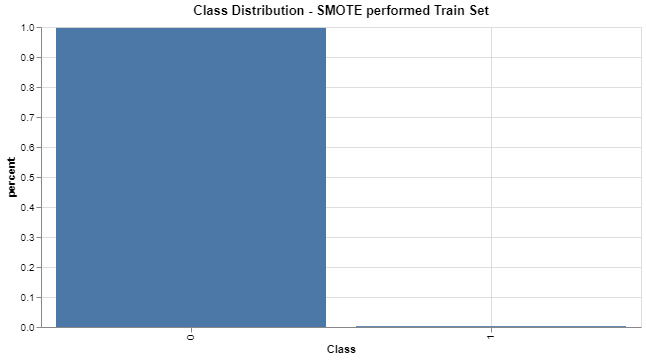

In [8]:
%chart x="Class", y=Percentage, title=Class Distribution - SMOTE performed Train Set, labelx=Class, labely=percent, width=600, height=300, typex=n

In [9]:
-- SMOTE performed data spread for testing data
select class_label as "Class", 1.000 * count(*) / (select count(*) from creditcard_test) as Percentage
from creditcard_test
group by "Class";
-- Training data is imbalanced and it is not required to perform SMOTE on training data as it is considered as real situations

Class Percentage 1 1 .002 2 0 .998

Success: 0 rows affected

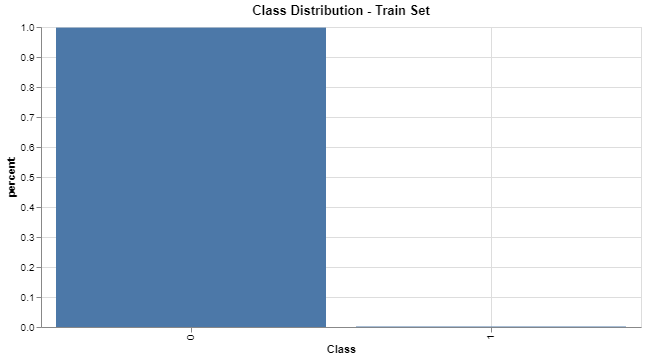

In [10]:
%chart x="Class", y=Percentage, title=Class Distribution - Train Set, labelx=Class, labely=percent, width=600, height=300, typex=n

<h2>Scaling the data </h2>

In [12]:
-- Using TD_ScaleFit on training data to fit table inorder to standardize the data.
select * from TD_ScaleFit (
    on creditcard_train2 as InputTable
    out permanent table OutputTable(ScaleFit)
    using
    ScaleMethod ('STD')
    TargetColumns ('[1:30]')
) as dt;

Success: 0 rows affected

TD_STATTYPE_SCLFIT Time_occured V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount 1 min 7 -35.9051049094583 -36.6254285561871 -30.1773174564996 -4.96481913884255 -25.7911323347667 -23.4967139298714 -31.1973285494605 -33.7854071933218 -9.46257260540015 -22.1870885620007 -4.01026786658629 -17.1504052507291 -3.5522658081574 -14.224403603167 -3.6199745919304 -12.4485623424367 -24.0190985475902 -9.33519307905321 -3.64976635315828 -21.964898279756 -16.6407847901225 -8.55580793045634 -19.3312549385962 -2.70467175751893 -4.78160552206407 -1.48843710210489 -9.89524404755692 -6.62137712208029 0 2 max 172716 2.40265203999086 16.497471901867 3.83373325164658 11.2295015434534 34.0993093435765 16.3555341574423 25.2351949863158 18.329405525597 7.9389799123294 11.5191058635386 9.32879925655782 3.96662580501996 4.26285092581374 5.1781873570192 5.50111659592562 7.05913181057395 6.73938438478335 3.64755482434799 4.55535937937598 11.1636710791909 22.5995433627945 5.7077226516112 12.1222924789545 3.52024099866823 3.62465204566888 2.96429950784935 8.25437559746772 15.8667207920692 5714.58 3 sum 9.441942e+08 -151.22235940357257 -301.0844008573835 -6.67487015920819 217.47232662652385 -154.42451206072192 60.44770847822094 -140.4764924623172 -11.273774305423842 -55.96748407837063 -162.36010995428683 74.73595698586558 13.903278459384117 -57.84324577830561 -242.54877845498623 110.64947928216658 76.35468825091161 -145.69946589742239 -123.16485522904338 -11.489384000962861 -150.2057952700134 15.264435279130062 -91.41461586831839 -71.4249034840341 -6.618594768054322 -57.29654328986526 61.14580628865325 -22.95529821931273 -17.327584843697466 894943.5899999978 4 count 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 5 null 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 avg 94419.42 -0.015122235940357257 -0.03010844008573835 -0.000667487015920819 0.021747232662652386 -0.015442451206072192 0.006044770847822094 -0.01404764924623172 -0.0011273774305423842 -0.005596748407837063 -0.016236010995428683 0.007473595698586559 0.0013903278459384118 -0.005784324577830561 -0.024254877845498624 0.011064947928216658 0.007635468825091161 -0.014569946589742238 -0.012316485522904338 -0.0011489384000962861 -0.01502057952700134 0.0015264435279130062 -0.00914146158683184 -0.007142490348403411 -0.0006618594768054323 -0.005729654328986526 0.006114580628865325 -0.002295529821931273 -0.0017327584843697466 89.49435899999978 7 variance 2.2465182327812724e+09 4.404954692691969 3.140426676405831 2.535454758952788 2.1058896829366365 2.0425534152050346 1.8356681445581617 1.832071073850928 1.5608342701714193 1.196255427851178 1.2516262835469782 1.0666927012356628 1.062171413553178 0.9700962809179944 0.9834275864906753 0.8503541882676348 0.8306538971624247 0.9203393015775608 0.7264346482699554 0.6623538637167563 0.7147708112738039 0.5766700389986887 0.5342122561239142 0.46654290822133077 0.36393865111637885 0.2692154496843424 0.22799295882313386 0.19258681440124922 0.14305884026371055 57649.06476482552 8 std 47395.07971253972 2.098693450035688 1.7720362958297977 1.5922315200613548 1.4510958252191146 1.4291078195376001 1.3548005675167494 1.3534725216063839 1.2492710621576097 1.0936799359540217 1.1187051090071163 1.0327565211440397 1.0305654741023602 0.9848854102330395 0.991629589984096 0.9221004028026493 0.9113565887031863 0.9592951931743446 0.8522687397793776 0.8138105604687031 0.8453989201511182 0.7593499667444444 0.7308617070953313 0.6830053103237989 0.603243116207112 0.5188338155318849 0.4774622074334801 0.4388251995040954 0.3782122874520131 240.0901910914918 9 ustd 47397.449644271706 2.098798392578946 1.7721249042902791 1.5923111376087238 1.4511683854524382 1.429179280288178 1.3548683126260506 1.353540200308409 1.2493335303958744 1.093734624052461 1.1187610484580603 1.0328081628432566 1

In [14]:
-- Using TD_ScaleTransform on training data to standardize the data.
create multiset table scaletransform_train as (
    select * from TD_ScaleTransform (
        on creditcard_train2 as InputTable
        on ScaleFit as FitTable dimension
        using
        Accumulate ('id', '"Class_label"')
    ) as dt
) with data;

Success: 0 rows affected

In [15]:
-- Checking the standardized data for train 
select * from scaletransform_train sample 10;

id Class_label Time_occured V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount 1 165841 0 0.49120246534452944 -4.4450510483306775 2.875913021261996 -2.6291864673342453 -1.6491912069129206 -1.2662844916134373 2.419610718042463 -6.3255223540006345 -17.61189164019726 0.17183625251547524 -2.0782622392247623 -2.3575182102323518 1.7707828047329326 -1.9765981929134921 3.2136159867009697 -0.8753310336008647 1.9144549198816898 1.1265855935079598 -0.18330027893442483 -1.7320666880432696 -1.7786823528282927 8.818075667195762 -4.7659105047930055 4.1758298863795575 -1.6334421247027078 0.26073296316508515 0.951906781468329 0.5996511964602171 -0.0873442417746508 -0.36858798186501923 2 30056 0 -1.2377955761614299 0.5612479241025017 -0.15631516036654183 0.8371412598474236 0.3638780951590923 -0.8296523382175454 -0.01426211430371453 -0.7307587611383267 0.24143549203211814 0.919583270889179 -0.08456092011432886 -0.4539598818448258 -0.5799216602511346 -1.3492694015906441 0.13796195031286307 2.1746823996919766 0.6793619339285742 -0.304825374748734 0.1789465552449735 -1.1377001890591785 -0.23143227831404495 0.29390002245155006 0.9371349377573787 0.04455963077594793 0.13992211012190098 0.13305594182375716 1.2718512937738033 0.05289275473503307 0.06567814804699341 -0.36504764564330294 3 252173 0 1.292551470987225 -0.046474468705246186 -0.39087453927023535 -0.26315045080817245 -2.5577949014059507 1.297339079782092 2.678530900677176 -0.5354006466718263 0.7338649135595122 -2.0676089529932162 0.6820637298465515 -0.48389816840865246 -1.1580391837951687 0.140908078766647 -0.3052545768832182 -0.2559156254813759 -0.8049732011659755 0.377689807787713 0.021839494156563482 -0.5196276412656057 -0.2934289465180417 0.00391688149280393 0.4837866927052546 -0.23608675834560489 1.1630415502024287 -0.15452281418653757 -0.1640823474721971 0.37687355298784253 0.3688877186955898 -0.31444166317994615 4 264869 0 1.4181552264003625 -0.06850533881624252 0.39427277721977677 -0.3688118020684321 -0.9378884651562741 -0.2136811958251554 -0.6577628056776363 0.619889565333014 0.009994042849966956 -1.3007206690633648 -0.13582449977816252 -0.6455920706716483 0.44150823966568353 0.9937239537216269 0.5270496349370563 0.08838644314841414 -2.049030696514481 -0.030822113470378342 0.9499883105429774 -1.3973822630462873 -0.7916085811092297 -0.4382108601657649 -0.835130592436194 0.34676157585247974 1.6885473188087523 -0.47037527176910193 -1.9952572480217243 -0.364358177482883 -0.17096786048652526 -0.010389258256074459 5 200386 0 0.822776968337551 -0.11844525823508653 0.2873491727786799 -1.0115828871638048 -0.34948034861268734 0.026564986345303212 -0.456049434646568 0.9160532694921272 0.20269444804813444 0.06309229898995024 -1.426154965155337 0.4284971689903353 0.7104784592545993 -0.13651831035937903 -1.1143251942785246 -1.7212665778815734 0.5068237322502928 0.7838396507044688 1.1445272032813942 0.16042819349213172 0.16688000074444942 0.2419176429959381 0.4126130317684955 1.1321041858176013 -0.8149357785446234 -3.5382497593775417 -0.9733312526951386 0.41081271297300426 0.8821017513392188 0.5117478579255222 6 172533 0 0.5636361445538863 0.704000107891809 -0.5676862969857944 -0.9598373381702735 0.33315538142042445 -0.25552216896081165 -0.6604926549102454 0.3199980956522604 -0.20244839784059113 0.4131735805917401 0.06888198834022004 0.9643687406258906 0.635791785368154 -0.7104555983335475 0.9064884315577598 0.23910942171682878 -0.002359939503770157 -0.6460872031199514 0.606395360144916 -0.1892254133838263 0.36113675774149917 0.6387810691182491 1.190907884617047 -0.3370598071389006 0.08529454258462023 0.14254160015113992 -0.3255376027948936 -0.1662211564400781 -0.04675300554348987 0.8184659277692745 7 91469 0 -0.6527137455539536 0.6066272827954116 -0.7948784259056745 0.4763987421552724 -0.848652331418313 -1.349174559256002 -0.5170357402296984 -0.8001751917484513 -0.16061083799585343 -1.5236023592781314 1.2120022217669462 -0.4025181772461623

<h2>Feature Engineering Pipeline using Column Transformer</h2>

In [22]:
-- the same operations which were applied on the training dataset had to be applied on test dataset as well so, we are using TD_ColumnTransfomer.
create multiset table scaletransform_test as (
    select * from TD_ColumnTransformer (
        on creditcard_test2 as InputTable
        on ScaleFit as scalefittable dimension
    )as dt
) with data;

ERROR: Unable to run SQL: Unable to run SQL query: Database reported error:3803:Table 'scaletransform_test' already exists.

In [17]:
-- Checking the standardized data for test
select * from scaletransform_test sample 10;

id Time_occured V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount Class_label 1 231446 1.1045572729810003 -1.4317773156980527 -1.3402252318768761 0.09532031388038685 -1.1959905789155059 1.5706713893629456 -1.5040715820416204 -0.5345537079056233 0.34231989928261497 -1.926941729583755 -0.2706969012862575 0.7459918197247152 0.36242816392024346 0.7360909357718652 0.51819235844875 -1.4728561663221242 1.1858617919100147 0.057134531720677596 -1.1247098397532425 0.42029811085878666 1.1011386304633253 0.8565064761420171 0.722990651734084 -0.7098560864743702 1.4104423183238364 2.173255281061287 -0.16050548783989324 -0.2947449554709008 -1.2844625340221414 -0.18948862006054684 0 2 110331 -0.4777377765230195 -0.07428316659364365 0.3555297402397763 0.8389572861131759 1.1760282257128558 0.2545106363616566 0.23090002169392174 0.11515375391100854 0.19125657047642433 -0.5391019278207659 0.15786422535076067 1.0725246774062804 0.7667315831332767 -0.29619506710705895 0.33288295805933016 -0.11133167230184374 -1.3600962846383684 0.661516958131546 -0.09747499946962215 2.0244765519992116 0.13371432177265363 0.09262147555863753 0.5609614518938775 -0.09100971085007281 0.0775383305293949 -0.557023449145627 -0.3631826373509744 0.3406372407580691 0.19713867120844117 -0.36858798186501923 0 3 215518 0.9639730595898133 -0.5590248545744458 0.19470651576859174 0.5221134982506329 -0.8468350969708623 0.8241529843506843 -0.9404204069724164 1.2539744548908442 -0.5375989662936039 -1.7642084809644332 0.13312257240841416 -0.9983183462018335 -0.4130265193987237 0.2889548004192332 0.13859308197509598 -0.817568490702892 -1.68035903967837 -0.7676398805437097 0.9044970911304075 -2.893162026431814 -0.7897136144550368 -0.5091262955678222 -0.7064772906846941 -0.8417528683561201 -0.09684455340301289 2.1824314440454775 -1.4447526164670343 -0.4400152833716303 -0.6109086049598451 -0.01871946113070108 0 4 43622 -1.1148925230316589 -0.8573948222022486 1.0599463502733601 -0.29018606398345315 -0.06269115113886173 0.6297780587286189 -0.07711312503059319 0.0948444744539949 0.6985233571001433 -0.5076792766438627 -1.0813999604337428 -1.3970383556119204 -0.383594334729853 0.20350983631300493 -0.765009297786718 0.8854398021125857 1.0966046640932292 0.5778194715744369 0.7059222770930571 -1.1860014309458162 -0.2638246383337667 -0.008741767400389462 -0.40799895677198084 -0.7157092698551784 -2.401172240477358 1.824042839494447 -0.6537748518596299 -0.9327911870595882 -0.18902452524573507 -0.36858798186501923 0 5 275197 1.5190939742411909 -0.6300728661990947 0.6362055099444317 -0.18777373423429233 -0.646600687902427 0.21464773317736535 -0.9229518685057705 0.8490771417623078 0.06354153645967749 -0.001476306533955758 -0.48813209727513146 -0.975118018467127 0.2967661360665189 0.012097311972723313 0.5115104261536132 -0.3393792204814289 -0.5068529155772231 -0.112742226635843 -0.7324224253932667 0.051653767331672984 -0.21199908284840693 -0.17766753437860616 -0.020436187147969777 0.31312667112666276 -0.0049597757135135525 0.07569223394213978 -0.23106369323719858 0.7188700275165584 0.39200644520254757 -0.14879557901799578 0 6 178330 0.6154136711428061 0.9722760552839476 -0.09788276982299607 -0.7572938223025351 0.1512235293963976 -0.004638561166892907 -0.5400238630007025 0.02668923544881655 -0.09212069782977532 0.4119757247475847 0.2526377849809586 0.4882059402261247 0.5058539426547306 -0.9102271486667414 0.6714524449131932 -0.590043993546715 0.24350712489901039 -0.6114154367790778 -0.16518450603864934 0.6893177523573975 -0.27375190084375406 -0.35021748501489697 -0.9818134851211977 0.43843997516334254 -0.5977989661982652 -0.6069293151979693 0.4072595396705247 -0.18312964238360754 -0.19093225457810808 -0.33114371994357256 0 7 140096 -0.22965295271188696 -1.276306733168998 -0.5947272825165911 -0.22916945893596588 -1.2827983045801696 0.5074235071733557 3.5197038335799595 0.9386809007299018 -0.44921690170677603 1.5651806756876092 0.31085566693397715

In [18]:
-- This is the sample train data fed for random forest in python
--select * from scaled_smote_train sample 5;

ERROR: Unable to run SQL: Unable to run SQL query: Database reported error:3807:Object 'scaled_smote_train' does not exist.

In [188]:
--select count(*) from creditcard.scaled_smote_train;

Count(*) 1 24650

In [142]:
-- This is the sample test data fed for random forest in python
--select * from KA255049.scaled_smote_test sample 5;

id Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount Class 1 59933 -0.9632285901899086 0.6894633961973792 -0.9230291637288786 0.7187444622794169 -0.9533958524475074 -1.5304632867395274 -0.13131369111239555 -1.3367191874237325 0.0335602649950972 -1.0779455536793197 1.2492513660996492 -1.0116040363051528 -1.1370963775999903 0.6896167895113796 -0.8030320892299545 1.3325148942076905 0.4089632948637275 0.04001153874034176 1.0703378045658944 -0.608959121167114 -0.18369769980268533 0.11653172431004391 0.6984764674778727 -0.20397389615629133 -0.18755129864606992 0.4581949804130031 -0.03636249580124693 0.1688076064053393 0.13916329626179147 -0.0013978079002834646 0 2 47110 -1.0893234374837728 -0.5117835187276844 0.6114398083360962 0.8285297080057115 -0.4828018474096409 -0.17758055446092097 -0.2270182903545114 0.1458410300758758 0.5674349917551533 -0.3275906074763261 -0.6822400383054664 1.1163335990070926 0.8264644019608015 -0.7713532190146664 0.5785438279656263 -0.8092620297038097 -0.019836205769830917 0.01354354899622551 -0.597008019259328 -0.4537874188954074 -0.20484962515972252 -0.08740329508496522 -0.23428877125591008 0.01779538833503832 0.3748915882952859 -0.6580539156577657 0.6156232215461909 0.4605646811972747 0.3187425831047085 -0.3492313067728856 0 3 43941 -1.118257024688477 -0.4884704910493867 0.006762954233508894 0.5198273703093786 1.185456791046109 -1.2733632659770024 0.24741941427674016 1.0211713878971789 0.25626248734342433 -0.45523422898147997 -0.6733117519118685 -0.7924323907154456 0.3191836066556254 0.5988175122135067 0.1618240955855517 0.6527908900568727 -0.2236602340336059 0.17588160231040514 0.34192378992602773 0.7611503721384936 1.019192943661005 0.4783500029072495 0.5195537572804451 1.4102772208408403 0.5938631384064131 -0.008231412885061518 -0.5836014020755231 -0.38780305422761485 0.010487088164417499 1.250043151664236 0 4 95913 -0.6167836289877289 -0.337370418620806 0.4310925800397576 1.0454345347153415 -0.3410320650252785 0.14639322144156208 -0.900640740206054 0.7382591820384766 -0.0708131761695856 -0.44979880359566415 -0.7043071015708695 -0.5519019416515881 -0.6075900671189884 -1.2275888730152902 0.49920871334080924 0.5622761469454107 0.5177578584979546 -0.5667065632340815 -0.7896514554378508 -0.512248317417027 -0.11925077009669963 -0.6263047527125164 -2.256091111056391 0.12930096390729534 0.4992766554416612 0.24339622326881993 -0.19970005272532781 -0.30351145081012165 -0.0851100014776482 -0.25347714242807157 0 5 263878 1.3969856172901978 -1.729521740499469 2.4089305744057445 -4.60252219629318 1.170849318057231 -0.797322418996885 -2.7017724245922734 -2.980095595073548 1.6261991161563956 -2.7899190984808904 -6.89679228173136 2.9289639437509254 -5.998433358239919 -0.16552258855420404 -8.750778323295219 0.046026805455635575 -4.721819264954017 -7.186680117971356 -2.353838302745482 0.5332330498617716 -0.005578489794611737 1.4207690571660765 0.3612905759244093 -0.7674223096012142 -0.5393219756688745 -0.3010655440448314 0.23600248024483905 0.8773448274472188 0.8712729826736023 -0.35171012021312714 1

<h2>Create a Logistic Regression model</h2>

In [24]:
-- Creating a GLM Classification model for Credicard data after preprocessing
create multiset table cc_glm_model as (
    select * from td_glm (
      ON scaletransform_train PARTITION BY ANY
      OUT TABLE MetaInformationTable(GLM_model_creditcard) 
      USING
      InputColumns ('[2:]')
      ResponseColumn('"Class_label"')
      Family('Binomial')
      RegularizationLambda(0.02)
      Alpha(0.5)
      IterNumNoChange(0)
      BatchSize(10000)
      MaxIterNum (100)
      LearningRate('optimal')
      InitialEta(0.01)
    ) as dt
) with data;

Success: 0 rows affected

Success: 0 rows affected

In [25]:
-- GLM model for Credit Card Fraud
select * from cc_glm_model

attribute predictor estimate value 1 19 V18 0 2 0 (Intercept)  -4.4405094443661195 3 -1 Loss Function  LOG    4 -12 Nesterov  FALSE 5 -3 Number of Observations  10000 6 17 V16 0 7 7 V6 0 8 15 V14 -0.14789168214771206 9 26 V25 0 10 13 V12 -0.04489853493658979 11 5 V4 0 12 11 V10 -0.009172332841020831 13 24 V23 0 14 30 Amount 0 15 3 V2 0 16 9 V8 0 17 22 V21 0 18 28 V27 0 19 1 Time_occured 0 20 -5 BIC  285.557064028929 21 20 V19 0 22 -7 Alpha  0.5 Elasticnet 23 18 V17 -0.10599527525691742 24 -9 Learning Rate (Initial)  0.01 25 -2 Loglik  -0.018256248833663145 26 -11 Momentum  0 27 8 V7 0 28 -13 LocalSGD Iterations  0 29 -4 AIC  62.036512497667324 30 16 V15 0 31 6 V5 0 32 14 V13 0 33 25 V24 0 34 12 V11 0 35 4 V3 -0.01835406261677519 36 10 V9 0 37 23 V22 0 38 29 V28 0 39 2 V1 0 40 27 V26 0 41 21 V20 0 42 -6 Regularization  0.02 ENABLED 43 -8 Number of Iterations  100 NOT CONVERGED 44 -10 Learning Rate (Final)  0.4244373524943592

In [26]:
-- GLM model for Credit Card Fraud iteration showing loss and bias in the model
select * from GLM_model_creditcard

iterNum loss eta bias 1 1 0.6931471805599917 2.6591479484724942 -1.3223942747753714 2 2 0.23806467748243076 2.5248679973653365 -1.8472243384925968 3 3 0.14941937920428264 2.4034977084492475 -2.1685687304437966 4 4 0.11183778977650442 2.293260768414053 -2.3982669451500347 5 5 0.0909254933768157 2.1926924566532464 -2.5756571943879703 6 6 0.07756290309621357 2.1005741929047903 -2.719233013986254 7 7 0.06826594299703774 2.0158839182149095 -2.839188110490141 8 8 0.06140937745054268 1.937758013864096 -2.9417426161981033 9 9 0.056146838212014424 1.8654617449475168 -3.030965819694636 10 10 0.051976802452120045 1.79836608234693 -3.1096680869577695 11 11 0.048588803133627234 1.7359293529529107 -3.17987020725272 12 12 0.045780137496424594 1.6776825840993903 -3.243072731057682 13 13 0.043412749766895464 1.6232177026989918 -3.300419562327355 14 14 0.04138931935601308 1.5721779607454862 -3.352802003537874 15 15 0.039639247330036924 1.5242501120877234 -3.4009274978928725 16 16 0.03811006270902931 1.4791579778180317 -3.445366526243631 17 17 0.036761948305304416 1.43665712098029 -3.4865854877286604 18 18 0.03556413903361138 1.3965304137098538 -3.5249703039383724 19 19 0.03449248513135972 1.358584327063188 -3.56084371626574 20 20 0.033527762889540416 1.3226458097164566 -3.5944781933557475 21 21 0.03265447821402554 1.2885596493020748 -3.6261057188271426 22 22 0.03186000296005734 1.2561862315035877 -3.655925320618127 23 23 0.03113203444647521 1.2253996286710636 -3.684109491513041 24 24 0.030461874872626755 1.196085962778124 -3.7108081676526194 25 25 0.02984525733519042 1.1681419978548093 -3.7361515904615397 26 26 0.029275759883943164 1.1414739252245887 -3.7602543604746694 27 27 0.02874798374972121 1.1159963114218905 -3.783217780821683 28 28 0.028257348843604438 1.0916311839279564 -3.8051317874372033 29 29 0.0277999386938005 1.068307234112496 -3.8260765481890537 30 30 0.02737238079978365 1.0459591202181953 -3.846123795335887 31 31 0.026971752915996176 1.0245268560385552 -3.8653379419795626 32 32 0.026595508682276323 1.0039552732445438 -3.883777022550233 33 33 0.026241417930795433 0.9841935472122051 -3.901493489127534 34 34 0.02590751828990442 0.9651947777705119 -3.91853488899794 35 35 0.02559207559579175 0.9469156175887911 -3.9349444438468884 36 36 0.02529355124976347 0.9293159420056042 -3.950761547058386 37 37 0.025010575108385214 0.9123585550057631 -3.9660221924970465 38 38 0.024741922821243004 0.8960089268110119 -3.9807593456900565 39 39 0.024486496773303355 0.8802349591885309 -3.9950032663665898 40 40 0.024243309970388243 0.865006775120609 -4.00878178974064 41 41 0.024011472343992694 0.8502965299354941 -4.022120572656601 42 42 0.023790179057274402 0.8360782413873691 -4.035043309690797 43 43 0.023578700475829384 0.8223276365039205 -4.047571923466823 44 44 0.023376373530785578 0.8090220133023494 -4.059726732759263 45 45 0.023182594252106226 0.7961401157165933 -4.071526601398905 46 46 0.02299681128997975 0.7836620202863241 -4.0829890705290905 47 47 0.02281852027413915 0.7715690333372159 -4.094130476378781 48 48 0.022647258886674973 0.7598435975364426 -4.104966055398192 49 49 0.02248260254472868 0.7484692068410161 -4.1155100383357315 50 50 0.022324160606399492 0.7374303289724852 -4.12577573461095 51 51 0.02217157302707036 0.7267123346522656 -4.13577560814962 52 52 0.0220245074047577 0.7163014329196298 -4.145521345687769 53 53 0.021882656362517013 0.7061846119309906 -4.155023918416465 54 54 0.021745735223743925 0.6963495847061107 -4.164293637724378 55 55 0.021613479942732626 0.6867847393455947 -4.173340205697192 56 56 0.021485645258290765 0.677479093295573 -4.182172760949202 57 57 0.021362003042788708 0.6684222512808463 -4.190799920290545 58 58 0.02124234082286856 0.6596043665677288 -4.199229816671689 59 59 0.02112646045129863 0.6510161052531114 -4.20747013379345 60 60 0.021014176912216787 0.6426486133074765 -4.215528137724682 61 61 0.020905317244357957 0.6344934861272307 -4.223410705829782 62 62 0.02079971956886421 0.6265427403762499 -4.2311243532

<h2>Making Predictions using Logistic Regression Model</h2>

In [27]:
-- Using the train data on the GLM model created earlier to predict whether it is a fraud or not fraud transaction
create multiset table train_data_test_results as (
    SELECT * from TD_GLMPredict (
      ON scaletransform_train as inputtable PARTITION BY ANY
      ON cc_glm_model AS Model DIMENSION
      USING
      IDColumn ('id')
      Accumulate('Amount','"Class_label"')
      OutputProb ('yes')
 --     Responses ('0','1')
    ) AS dt
) with data;

Success: 0 rows affected

In [28]:
-- Sample results set containing Prediction and Probablities
select * from train_data_test_results sample 10;

id prediction prob Amount Class_label 1 147704 0 0.9882036887240433 -0.2428019184581572 0 2 84425 0 0.9876365921777224 -0.22280943155905333 0 3 45010 0 0.9888196875578311 -0.3416397755656021 0 4 29689 0 0.9877142858790512 -0.15616780856204035 0 5 76719 0 0.9889259394716802 -0.20406647509114342 0 6 258521 0 0.9871276275812735 -0.24800829525479884 0 7 44651 0 0.9891535158966476 -0.14408901439383176 0 8 153762 0 0.9896066772500404 -0.3394739228181992 0 9 25788 0 0.9869971097618808 -0.36858798186501923 0 10 59323 0 0.9870917849922728 -0.32527092691696075 0

<h2>Model Evaluation on Training data </h2>

In [29]:
-- Using ROC function to evaluate the results of above model.
select * from TD_ROC(
on (select id, cast(prediction as int) as prediction, prob, Amount, "Class_label" from train_data_test_results) as InputTable
OUT PERMANENT TABLE OutputTable(RocTable_train_data)
Using
ProbabilityColumn ('prob')
ObservationColumn ('prediction')
PositiveLabel ('1')
NumThresholds (50)
AUC('true')
GINI('true')
)As dt;

Success: 0 rows affected

AUC GINI 1 0.00025010004001596586 -0.9994997999199681

In [30]:
-- To view Threshold, True positive rate and false positive rate
select * from RocTable_train_data;

threshold_value tpr fpr 1 0 1 1 2 0.02040816326530612 1 1 3 0.04081632653061224 1 1 4 0.061224489795918366 1 1 5 0.08163265306122448 1 1 6 0.1020408163265306 1 1 7 0.12244897959183673 1 1 8 0.14285714285714285 1 1 9 0.16326530612244897 1 1 10 0.18367346938775508 1 1 11 0.2040816326530612 1 1 12 0.22448979591836732 1 1 13 0.24489795918367346 1 1 14 0.26530612244897955 1 1 15 0.2857142857142857 1 1 16 0.3061224489795918 1 1 17 0.32653061224489793 1 1 18 0.3469387755102041 1 1 19 0.36734693877551017 1 1 20 0.3877551020408163 1 1 21 0.4081632653061224 1 1 22 0.42857142857142855 1 1 23 0.44897959183673464 1 1 24 0.4693877551020408 1 1 25 0.4897959183673469 1 1 26 0.5102040816326531 1 1 27 0.5306122448979591 1 1 28 0.5510204081632653 1 0.9998999599839936 29 0.5714285714285714 1 0.9998999599839936 30 0.5918367346938775 1 0.9998999599839936 31 0.6122448979591836 1 0.9997999199679872 32 0.6326530612244897 0.75 0.9997999199679872 33 0.6530612244897959 0.75 0.9997999199679872 34 0.673469387755102 0.5 0.9997999199679872 35 0.6938775510204082 0.5 0.9996998799519808 36 0.7142857142857142 0.25 0.9996998799519808 37 0.7346938775510203 0 0.9996998799519808 38 0.7551020408163265 0 0.9996998799519808 39 0.7755102040816326 0 0.9995998399359743 40 0.7959183673469387 0 0.9993997599039616 41 0.8163265306122448 0 0.9992997198879552 42 0.836734693877551 0 0.998999599839936 43 0.8571428571428571 0 0.9988995598239295 44 0.8775510204081632 0 0.9987995198079231 45 0.8979591836734693 0 0.9987995198079231 46 0.9183673469387754 0 0.9985994397759104 47 0.9387755102040816 0 0.9983993597438976 48 0.9591836734693877 0 0.9978991596638656 49 0.9795918367346939 0 0.9958983593437375 50 0.9999999999999999 0 0

In [32]:
-- Evaluating the model performance tested with train data
SELECT * FROM TD_ClassificationEvaluator(
   ON (select id, cast(prediction as char) as prediction, prob, Amount, cast("Class_label" as char) as "Class" from train_data_test_results) AS InputTable
   OUT TABLE OutputTable(GLM_classification_evaluation_train)
   USING
   ObservationColumn('"Class"')
   PredictionColumn('prediction')
   Labels('0','1')
) AS dt;

Success: 0 rows affected

SeqNum Prediction Mapping CLASS_1 CLASS_2 Precision Recall F1 Support 1 0 0 CLASS_1 9973 23 0.9976990796318528 1 0.9988482147328359 9973 2 1 1 CLASS_2 0 4 1 0.14814814814814814 0.25806451612903225 27

In [33]:
-- to view accuracies and other additional metrics
select * from GLM_classification_evaluation_train;

SeqNum Metric MetricValue 1 1 Accuracy                                           0.9977 2 2 Micro-Precision                                    0.9977 3 3 Micro-Recall                                       0.9977 4 4 Micro-F1                                           0.9977 5 5 Macro-Precision                                    0.9988495398159264 6 6 Macro-Recall                                       0.5740740740740741 7 7 Macro-F1                                           0.6284563654309341 8 8 Weighted-Precision                                 0.9977052921168468 9 9 Weighted-Recall                                    0.9977 10 10 Weighted-F1                                        0.9968480987466055

In [34]:
-- Tagging the accuracy value to check the output

select /*train_accuracy_GLM*/ round(MetricValue,3) as train_accuracy_GLM
from GLM_classification_evaluation_train
where Metric like 'Accuracy%';

train_accuracy_GLM 1 0.998

<h2>Model Evaluation on Test Data </h2>

In [8]:
-- Using the test data on the GLM model created earlier to predict whether it is a fraud or not fraud transaction
create multiset table test_results as (
    SELECT * from TD_GLMPredict (
      ON scaletransform_test as inputtable PARTITION BY ANY
      ON cc_glm_model AS Model DIMENSION
      USING
      IDColumn ('id')
      Accumulate('Amount','"Class_label"')
      OutputProb ('yes')
 --     Responses ('0','1')
    ) AS dt
) with data;

Success: 0 rows affected

In [9]:
-- Sample results set containing Prediction and Probablities
select * from test_results sample 10;

id prediction prob Amount Class_label 1 46696 0 0.9860594769955833 0.04350715434275978 0 2 123919 0 0.9878714886135483 0.9120141060513314 0 3 20119 0 0.9863356964937517 -0.3652975517295417 0 4 267740 0 0.9873324941022008 0.5394041314692827 0 5 82961 0 0.9886506256511296 -0.3353088213808859 0 6 284679 0 0.9886770194549982 -0.3620071215940642 0 7 241033 0 0.986702505560807 -0.30611146030531955 0 8 20683 0 0.987516414355573 -0.18157492732965155 0 9 238964 0 0.9886900342479333 -0.04371006975458095 0 10 229323 0 0.987631053292877 -0.36450618245645217 0

In [10]:
-- Using ROC function to evaluate the results of above model.
select * from TD_ROC(
on (select id, cast(prediction as int) as prediction, prob, Amount, "Class_label" from test_results) as InputTable
OUT PERMANENT TABLE OutputTable(RocTable_test_data)
Using
ProbabilityColumn ('prob')
ObservationColumn ('prediction')
PositiveLabel ('1')
NumThresholds (50)
AUC('true')
GINI('true')
)As dt;

Success: 0 rows affected

AUC GINI 1 0.00010005002501245475 -0.9997998999499751

In [11]:
-- ROC Table
select * from RocTable_test_data

threshold_value tpr fpr 1 0 1 1 2 0.02040816326530612 1 1 3 0.04081632653061224 1 1 4 0.061224489795918366 1 1 5 0.08163265306122448 1 1 6 0.1020408163265306 1 1 7 0.12244897959183673 1 1 8 0.14285714285714285 1 1 9 0.16326530612244897 1 1 10 0.18367346938775508 1 1 11 0.2040816326530612 1 1 12 0.22448979591836732 1 1 13 0.24489795918367346 1 1 14 0.26530612244897955 1 1 15 0.2857142857142857 1 1 16 0.3061224489795918 1 1 17 0.32653061224489793 1 1 18 0.3469387755102041 1 1 19 0.36734693877551017 1 1 20 0.3877551020408163 1 1 21 0.4081632653061224 1 1 22 0.42857142857142855 1 1 23 0.44897959183673464 1 1 24 0.4693877551020408 1 1 25 0.4897959183673469 1 1 26 0.5102040816326531 1 1 27 0.5306122448979591 1 0.9998999499749875 28 0.5510204081632653 1 0.9998999499749875 29 0.5714285714285714 1 0.9998999499749875 30 0.5918367346938775 1 0.9998999499749875 31 0.6122448979591836 0.6 0.9998999499749875 32 0.6326530612244897 0.6 0.9998999499749875 33 0.6530612244897959 0.4 0.9998999499749875 34 0.673469387755102 0.4 0.9998999499749875 35 0.6938775510204082 0.2 0.9998999499749875 36 0.7142857142857142 0.2 0.9998999499749875 37 0.7346938775510203 0.2 0.9998999499749875 38 0.7551020408163265 0 0.9998999499749875 39 0.7755102040816326 0 0.9998999499749875 40 0.7959183673469387 0 0.9998999499749875 41 0.8163265306122448 0 0.999799899949975 42 0.836734693877551 0 0.9996998499249625 43 0.8571428571428571 0 0.99959979989995 44 0.8775510204081632 0 0.9994997498749375 45 0.8979591836734693 0 0.9993996998499249 46 0.9183673469387754 0 0.9992996498249125 47 0.9387755102040816 0 0.9989994997498749 48 0.9591836734693877 0 0.9987993996998499 49 0.9795918367346939 0 0.9973986993496748 50 0.9999999999999999 0 0

In [12]:
-- Evaluating the model performance tested with test data
SELECT * FROM TD_ClassificationEvaluator(
   ON (select id, cast(prediction as char) as prediction, prob, Amount, cast("Class_label" as char) as "Class" from test_results) AS InputTable
   OUT TABLE OutputTable(GLM_classification_evaluation_test)
   USING
   ObservationColumn('"Class"')
   PredictionColumn('prediction')
   Labels('0','1')
) AS dt;

Success: 0 rows affected

SeqNum Prediction Mapping CLASS_1 CLASS_2 Precision Recall F1 Support 1 0 0 CLASS_1 9980 15 0.9984992496248124 1 0.9992490613266584 9980 2 1 1 CLASS_2 0 5 1 0.25 0.4 20

In [13]:
select * from GLM_classification_evaluation_test;

SeqNum Metric MetricValue 1 1 Accuracy                                           0.9985 2 2 Micro-Precision                                    0.9985 3 3 Micro-Recall                                       0.9985 4 4 Micro-F1                                           0.9985 5 5 Macro-Precision                                    0.9992496248124062 6 6 Macro-Recall                                       0.625 7 7 Macro-F1                                           0.6996245306633292 8 8 Weighted-Precision                                 0.9985022511255627 9 9 Weighted-Recall                                    0.9985 10 10 Weighted-F1                                        0.9980505632040051

In [14]:
select /*test_accuracy_GLM*/ MetricValue as test_accuracy_GLM
from GLM_classification_evaluation_test
where Metric like 'Accuracy%';

test_accuracy_GLM 1 0.9985

<h2>Create a Decision Forest Model</h2>

In [16]:
-- Creating Decision forest model for Credit Card Fraud Data
CREATE multiset table DF_CC_model as (
SELECT * FROM TD_DecisionForest (
ON scaled_smote_train as inputtable partition by ANY
USING
  ResponseColumn('"Class_label"')
  InputColumns('[1:30]')
  MaxDepth(12)
  MinNodeSize(1)
  NumTrees(-1)
  TreeType('CLASSIFICATION')
  Seed(2)
  --Mtry(3)
  --MtrySeed(1)
  --isDebug('f')
) as dt
) with data;

Success: 0 rows affected

In [17]:
select * from DF_CC_model;

task_index tree_num tree 1 1 2 {"id_":1,"size_":8000,"maxDepth_":12,"responseCounts_":{"0":4144,"1":3856},"nodeType_":"CLASSIFICATION_NODE","split_":{"splitValue_":-1.999712,"attr_":"V14","type_":"CLASSIFICATION_NUMERIC_SPLIT","score_":0.499352,"scoreImprove_":0.393260,"leftNodeSize_":3640,"rightNodeSize_":4360},"leftChild_":{"id_":2,"size_":3640,"maxDepth_":11,"responseCounts_":{"1":3521,"0":119},"nodeType_":"CLASSIFICATION_NODE","split_":{"splitValue_":-0.083979,"attr_":"V4","type_":"CLASSIFICATION_NUMERIC_SPLIT","score_":0.063247,"scoreImprove_":0.010283,"leftNodeSize_":55,"rightNodeSize_":3585},"leftChild_":{"id_":4,"size_":55,"maxDepth_":10,"responseCounts_":{"0":49,"1":6},"nodeType_":"CLASSIFICATION_NODE","split_":{"splitValue_":-2.721922,"attr_":"V10","type_":"CLASSIFICATION_NUMERIC_SPLIT","score_":0.194380,"scoreImprove_":0.001091,"leftNodeSize_":5,"rightNodeSize_":50},"leftChild_":{"id_":8,"size_":5,"maxDepth_":9,"label_":"1","nodeType_":"CLASSIFICATION_LEAF"},"rightChild_":{"id_":9,"size_":50,"maxDepth_":9,"responseCounts_":{"1":1,"0":49},"nodeType_":"CLASSIFICATION_NODE","split_":{"splitValue_":0.727312,"attr_":"V21","type_":"CLASSIFICATION_NUMERIC_SPLIT","score_":0.039200,"scoreImprove_":0.000245,"leftNodeSize_":49,"rightNodeSize_":1},"leftChild_":{"id_":18,"size_":49,"maxDepth_":8,"label_":"0","nodeType_":"CLASSIFICATION_LEAF"},"rightChild_":{"id_":19,"size_":1,"maxDepth_":8,"label_":"1","nodeType_":"CLASSIFICATION_LEAF"}}},"rightChild_":{"id_":5,"size_":3585,"maxDepth_":10,"responseCounts_":{"0":70,"1":3515},"nodeType_":"CLASSIFICATION_NODE","split_":{"splitValue_":0.089266,"attr_":"V12","type_":"CLASSIFICATION_NUMERIC_SPLIT","score_":0.038289,"scoreImprove_":0.005311,"leftNodeSize_":3552,"rightNodeSize_":33},"leftChild_":{"id_":10,"size_":3552,"maxDepth_":9,"responseCounts_":{"1":3509,"0":43},"nodeType_":"CLASSIFICATION_NODE","split_":{"splitValue_":0.937334,"attr_":"V1","type_":"CLASSIFICATION_NUMERIC_SPLIT","score_":0.023919,"scoreImprove_":0.001734,"leftNodeSize_":3543,"rightNodeSize_":9},"leftChild_":{"id_":20,"size_":3543,"maxDepth_":8,"responseCounts_":{"0":35,"1":3508},"nodeType_":"CLASSIFICATION_NODE","split_":{"splitValue_":0.451611,"attr_":"V7","type_":"CLASSIFICATION_NUMERIC_SPLIT","score_":0.019562,"scoreImprove_":0.001305,"leftNodeSize_":3421,"rightNodeSize_":122},"leftChild_":{"id_":40,"size_":3421,"maxDepth_":7,"responseCounts_":{"1":3412,"0":9},"nodeType_":"CLASSIFICATION_NODE","split_":{"splitValue_":-1.098212,"attr_":"V11","type_":"CLASSIFICATION_NUMERIC_SPLIT","score_":0.005248,"scoreImprove_":0.000249,"leftNodeSize_":1,"rightNodeSize_":3420},"leftChild_":{"id_":80,"size_":1,"maxDepth_":6,"label_":"0","nodeType_":"CLASSIFICATION_LEAF"},"rightChild_":{"id_":81,"size_":3420,"maxDepth_":6,"responseCounts_":{"0":8,"1":3412},"nodeType_":"CLASSIFICATION_NODE","split_":{"splitValue_":2.580433,"attr_":"V15","type_":"CLASSIFICATION_NUMERIC_SPLIT","score_":0.004667,"scoreImprove_":0.000249,"leftNodeSize_":3419,"rightNodeSize_":1},"leftChild_":{"id_":162,"size_":3419,"maxDepth_":5,"responseCounts_":{"1":3412,"0":7},"nodeType_":"CLASSIFICATION_NODE","split_":{"splitValue_":2.392165,"attr_":"V16","type_":"CLASSIFICATION_NUMERIC_SPLIT","score_":0.004086,"scoreImprove_":0.000124,"leftNodeSize_":3417,"rightNodeSize_":2},"leftChild_":{"id_":324,"size_":3417,"maxDepth_":4,"responseCounts_":{"0":6,"1":3411},"nodeType_":"CLASSIFICATION_NODE","split_":{"splitValue_":2.140718,"attr_":"V18","type_":"CLASSIFICATION_NUMERIC_SPLIT","score_":0.003506,"scoreImprove_":0.000081,"leftNodeSize_":3369,"rightNodeSize_":48},"leftChild_":{"id_":648,"size_":3369,"maxDepth_":3,"responseCounts_":{"1":3367,"0":2},"nodeType_":"CLASSIFICATION_NODE","split_":{"splitValue_":-0.655345,"attr_":"V11","type_":"CLASSIFICATION_NUMERIC_SPLIT","score_":0.001187,"scoreImprove_":0.000062,"leftNodeSize_":4,"rightNodeSize_":3365},"leftChild_":{"id_":1296,"size_":4,"maxDepth_":2,"responseCounts_":{"0":1,"1":3},"nodeType_":"CLASSIFICATION_NODE","spli

In [18]:
-- Predicting the results for train data
create multiset table DF_CC_Predict_train as (
    select * from DecisionForestPredict (
        on  scaled_smote_train partition by any
        on DF_CC_model as Model dimension
        using
        IDColumn ('id')
        OutputProb ('true')
        Responses ('0', '1')
        Accumulate ('"Class_label"')
    ) as dt
) with data;

Success: 0 rows affected

In [3]:
-- Checking the sample predictions
select * from DF_CC_Predict_train sample 10

Class_label id prediction prob_0 prob_1 1 1 175647 1 0.2982456140350877 0.7017543859649122 2 0 257739 0 0.9649122807017544 0.03508771929824561 3 1 145210 1 0 1 4 0 95194 0 0.9824561403508771 0.017543859649122806 5 1 128281 1 0.017543859649122806 0.9824561403508771 6 0 14826 0 1 0 7 1 239987 1 0.05263157894736842 0.9473684210526315 8 0 86010 0 0.631578947368421 0.3684210526315789 9 1 151767 1 0 1 10 0 49584 0 1 0

In [4]:
-- Evaluating the model predictions for train data
SELECT * FROM TD_ClassificationEvaluator(
   ON (select prediction, cast("Class_label" as VARCHAR(32000) CHARACTER SET UNICODE NOT CASESPECIFIC) as "Class" from DF_CC_Predict_train) AS InputTable
   OUT TABLE OutputTable(df_classification_evaluation_train)
   USING
   ObservationColumn('"Class"')
   PredictionColumn('prediction')
   Labels('0','1')
) AS dt;

Success: 0 rows affected

SeqNum Prediction Mapping CLASS_1 CLASS_2 Precision Recall F1 Support 1 0 0 CLASS_1 226264 1760 0.9922815142265726 0.9947812935533368 0.9935298314945935 227451 2 1 1 CLASS_2 1187 221496 0.9946695526825128 0.9921166732361056 0.9933914728247586 223256

In [5]:
-- Viewing the results
select * from df_classification_evaluation_train;

SeqNum Metric MetricValue 1 1 Accuracy                                           0.9934613840033547 2 2 Micro-Precision                                    0.9934613840033547 3 3 Micro-Recall                                       0.9934613840033547 4 4 Micro-F1                                           0.9934613840033547 5 5 Macro-Precision                                    0.9934755334545426 6 6 Macro-Recall                                       0.9934489833947212 7 7 Macro-F1                                           0.993460652159676 8 8 Weighted-Precision                                 0.9934644200024301 9 9 Weighted-Recall                                    0.9934613840033547 10 10 Weighted-F1                                        0.9934612960531811

In [6]:
select /*train_accuracy_DF*/ MetricValue as train_accuracy_DF
from df_classification_evaluation_train
where Metric like 'Accuracy%';

train_accuracy_DF 1 0.9934613840033547

In [8]:
-- Evaluating the model predictions for test data
create multiset table DF_CC_Predict as (
    select * from DecisionForestPredict (
        on  scaled_smote_test partition by any
        on DF_CC_model as Model dimension
        using
        IDColumn ('id')
        OutputProb ('true')
        Responses ('0', '1')
        Accumulate ('"Class_label"')
    ) as dt
) with data;

Success: 0 rows affected

In [9]:
-- Checking the sample predictions
select * from DF_CC_Predict sample 10

Class_label id prediction prob_0 prob_1 1 0 13641 0 1 0 2 0 31562 0 1 0 3 0 100913 0 0.9298245614035088 0.07017543859649122 4 0 38362 0 1 0 5 0 223703 0 0.8596491228070176 0.14035087719298245 6 0 249084 0 1 0 7 0 258359 0 1 0 8 0 166532 0 1 0 9 0 109941 0 1 0 10 0 126459 0 1 0

<h2>Model Evaluation</h2>

In [10]:
-- Evaluating the model predictions for test data
SELECT * FROM TD_ClassificationEvaluator(
   ON (select prediction, cast("Class_label" as VARCHAR(32000) CHARACTER SET UNICODE NOT CASESPECIFIC) as "Class" from DF_CC_Predict) AS InputTable
   OUT TABLE OutputTable(df_classification_evaluation)
   USING
   ObservationColumn('"Class"')
   PredictionColumn('prediction')
   Labels('0','1')
) AS dt;

Success: 0 rows affected

SeqNum Prediction Mapping CLASS_1 CLASS_2 Precision Recall F1 Support 1 0 0 CLASS_1 56597 10 0.9998233434027594 0.995304586381542 0.9975588476350786 56864 2 1 1 CLASS_2 267 88 0.24788732394366197 0.8979591836734694 0.38852097130242824 98

In [11]:
select * from df_classification_evaluation;

SeqNum Metric MetricValue 1 1 Accuracy                                           0.9951371089498262 2 2 Micro-Precision                                    0.9951371089498262 3 3 Micro-Recall                                       0.9951371089498262 4 4 Micro-F1                                           0.9951371089498262 5 5 Macro-Precision                                    0.6238553336732107 6 6 Macro-Recall                                       0.9466318850275057 7 7 Macro-F1                                           0.6930399094687534 8 8 Weighted-Precision                                 0.9985296786805413 9 9 Weighted-Recall                                    0.9951371089498262 10 10 Weighted-F1                                        0.9965110313385898

In [12]:
select /*test_accuracy_DF*/ MetricValue as test_accuracy_DF
from df_classification_evaluation
where Metric like 'Accuracy%';

test_accuracy_DF 1 0.9951371089498262

Cleanup

In [ ]:
drop table ScaleFit;

drop table scaletransform_train;

drop table scaletransform_test;

drop table GLM_model_creditcard;

drop table cc_glm_model;

drop table train_data_test_results;

drop table RocTable_train_data;

drop table GLM_classification_evaluation_train;

drop table test_results;

drop table RocTable_test_data;

drop table GLM_classification_evaluation_test;

drop table DF_CC_model;

drop table DF_CC_Predict_train;

drop table df_classification_evaluation_train;

drop table DF_CC_Predict;

drop table df_classification_evaluation;